## Simple Linear Regression

In [27]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns


In [28]:
#importing data set
df=pd.read_csv('Documents/swedish_insurance.csv')

In [29]:
df.head()

,No of Claims,Total Payment in thounsands of Swedish Kronor
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


Text(0, 0.5, 'Total Payment in thousands of Swedish Kronor')

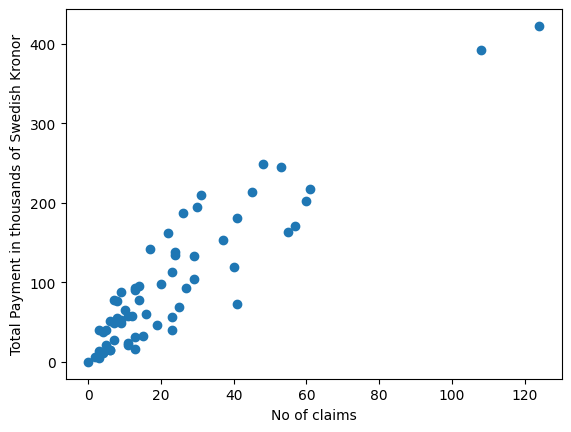

In [30]:
#scatter plot
plt.scatter(df[' No of Claims'],df['Total Payment in thounsands of Swedish Kronor'])
plt.xlabel('No of claims')
plt.ylabel('Total Payment in thousands of Swedish Kronor')

In [31]:
# Correlation
df.corr()

,No of Claims,Total Payment in thounsands of Swedish Kronor
No of Claims,1.000000,0.912878
Total Payment in thounsands of Swedish Kronor,0.912878,1.000000


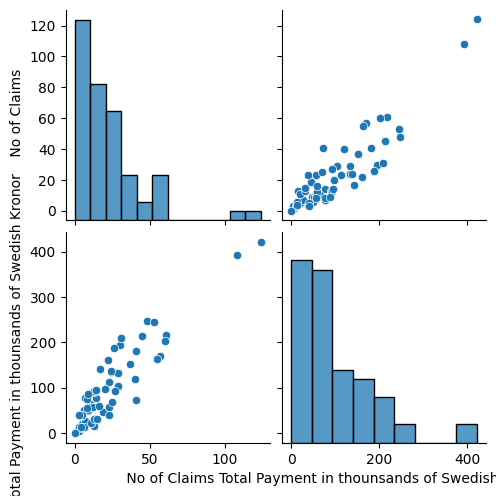

In [32]:
#Seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [33]:
#Independent and dependent features
X=df[[' No of Claims']]
y=df['Total Payment in thounsands of Swedish Kronor']

In [34]:
X.head()

,No of Claims
0,108
1,19
2,13
3,124
4,40


In [35]:
y.head()

0    392.5
1     46.2
2     15.7
3    422.2
4    119.4
Name: Total Payment in thounsands of Swedish Kronor, dtype: float64

In [36]:
#spliting dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [37]:
#Standardization
from sklearn.preprocessing import StandardScaler

In [38]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [39]:
X_test=scaler.transform(X_test)

In [40]:
X_test

array([[ 0.08105592],
       [-0.80173131],
       [-0.72147793],
       [-0.68135123],
       [ 0.04092923],
       [ 0.48232284],
       [-0.03932416],
       [-0.92211139],
       [-0.48071777],
       [-0.841858  ],
       [-0.64122454],
       [ 0.1613093 ],
       [-0.88198469]])

In [41]:
#import estimator/model 
from sklearn.linear_model import LinearRegression
#fit the model on training dataset
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [42]:
print("coefficient or slope:",model.coef_)
print("Intercept:",model.intercept_)

coefficient or slope: [84.33547275]
Intercept: 104.1


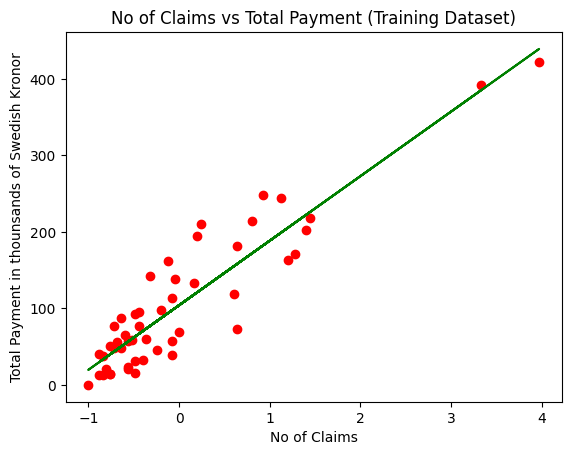

In [43]:
#Visualizing Training set results
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,model.predict(X_train),color='green')
plt.title("No of Claims vs Total Payment (Training Dataset)")  
plt.xlabel("No of Claims")  
plt.ylabel("Total Payment in thounsands of Swedish Kronor")  
plt.show()   

In [44]:
#Prediction for test data
y_pred=model.predict(X_test)
y_pred

array([110.93588918,  36.48561098,  43.25381809,  46.63792164,
       107.55178563, 144.77692473, 100.78357852,  26.33330031,
        63.55843942,  33.10150742,  50.0220252 , 117.70409629,
        29.71740387])

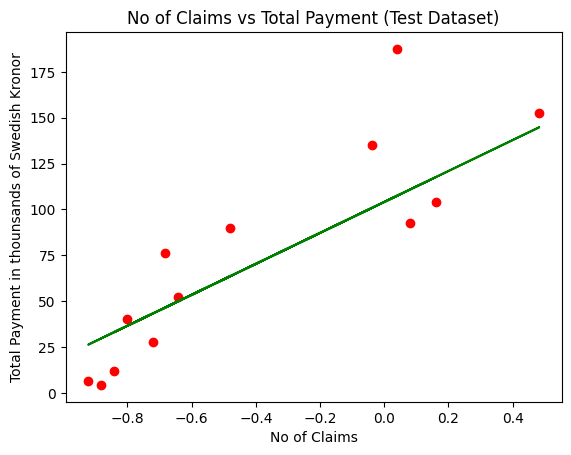

In [45]:
#Visualizing Test set results
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,y_pred,color='green')
plt.title("No of Claims vs Total Payment (Test Dataset)")  
plt.xlabel("No of Claims")  
plt.ylabel("Total Payment in thounsands of Swedish Kronor")  
plt.show() 

## Evaluating Model

In [46]:
#check the score of model on test data
model.score(X_test,y_test)

0.7226000085295174

In [47]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))


MAE 22.894594543310767


In [48]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7226000085295174

In [49]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

880.5694066283223

The high mean squared error could be due to outliers or the relation between variables is not really linear